# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline
pd.set_option('display.max_columns', None)

# Bring in data

In [2]:
human_df = pd.read_csv("../Data/human-development-index.csv")
happiness = pd.read_csv("../Data/happiness-cantril-ladder.csv")

cancer_death = pd.read_csv("../Data/cancer-death-rates.csv")
cancer_incidence = pd.read_csv("../Data/cancer-incidence.csv")
dalys = pd.read_csv("../Data/dalys-rate-from-all-causes.csv")
life_exp = pd.read_csv("../Data/life-expectancy.csv")
mental_health = pd.read_csv("../Data/mental-health-share-of-total-disease-burden.csv")
air_pollution = pd.read_csv("../Data/death-rate-by-source-from-air-pollution.csv")
vac_prev_death = pd.read_csv("../Data/deaths-caused-by-vaccine-preventable-diseases.csv")
health_ins_cov = pd.read_csv("../Data/health-insurance-coverage-in-the-us.csv")
death_risk = pd.read_csv("../Data/number-of-deaths-by-risk-factor.csv")
suicide = pd.read_csv("../Data/suicide-death-rates.csv")
inf_disease = pd.read_csv("../Data/the-number-of-cases-of-infectious-diseases.csv")
gdp = pd.read_csv("../Data/maddison-data-gdp-per-capita-in-2011us-single-benchmark.csv")
co2 = pd.read_csv("../Data/annual-co2-emissions-per-country.csv")
child_mort = pd.read_csv("../Data/child-mortality-igme.csv")
malnutrition = pd.read_csv("../Data/malnutrition-death-rates.csv")
household_debt = pd.read_csv("../Data/DP_LIVE_22062021225907296_hd.csv")
labor_comp = pd.read_csv("../Data/DP_LIVE_22062021234414600_lc.csv")
road_accidents = pd.read_csv("../Data/DP_LIVE_22062021234801821_ra.csv")
waste = pd.read_csv("../Data/DP_LIVE_22062021234901304_w.csv")
violent_crime = pd.read_csv("../Data/table-1_FBI.csv",skiprows = 2, header=[0, 1])


# Clean and Transform Data
Filter for the Country, and year(method in some cases)<br>
Sort values for readability <br>
Insert the 'start_value' column, to get the 'score' calculation <br>
The 'score' value represents change from the 'start_value'. Calculated by subtracting the current value from the 'start_value'.<br>
Another line to calculate the 'score' calculated as a rate from the previous year.<br>
Reduce columns <br>

In [3]:
#filter and clean the hdi data
human_df_clean = human_df[(human_df['Code'] == 'USA')&(human_df['Year'] >= 2006)&(human_df['Year'] < 2018)]
human_df_clean = human_df_clean.sort_values(['Year'], ascending = (True))
human_df_clean.insert(4, 'start_value_human', 0.901)
#human_df_clean['start_value_human'] = (human_df_clean['Human Development Index (UNDP)'].shift(1))
human_df_clean['score_human'] = round((human_df_clean['Human Development Index (UNDP)'] / human_df_clean['start_value_human'])-1,4)
human_df_clean = human_df_clean[['Entity', 'Year','score_human']]

In [4]:
#filter and clean happiness data
happiness_clean = happiness[(happiness['Code'] == 'USA')&(happiness['Year'] >= 2006)&(happiness['Year'] < 2018)]
happiness_clean = happiness_clean.sort_values(['Year'], ascending = (True))
happiness_clean.insert(4, 'start_value_h', 7.181794)
#happiness_clean['start_value_h'] = (happiness_clean['Life satisfaction in Cantril Ladder (World Happiness Report 2019)'].shift(1))
happiness_clean['score_happy'] = round((happiness_clean['Life satisfaction in Cantril Ladder (World Happiness Report 2019)'] / happiness_clean['start_value_h'])-1,4)
happiness_clean = happiness_clean[['Entity', 'Year','score_happy']]

In [5]:
#filter and clean cancer death data
cancer_death_clean = cancer_death[(cancer_death['Code'] == 'USA')&(cancer_death['Year'] >= 2006)&(cancer_death['Year'] < 2018)]
cancer_death_clean = cancer_death_clean.sort_values(['Year'], ascending = (True))
cancer_death_clean.insert(4, 'start_value_cd', 139.857968)
#cancer_death_clean['start_value_cd'] = (cancer_death_clean['Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate)'].shift(1))
cancer_death_clean['score_cd'] = round((cancer_death_clean['Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate)'] / cancer_death_clean['start_value_cd'])-1,4)
cancer_death_clean = cancer_death_clean[['Entity', 'Year','score_cd']]

In [6]:
#filter and clean cancer incidence data
cancer_incidence_clean = cancer_incidence[(cancer_incidence['Code'] == 'USA')&(cancer_incidence['Year'] >= 2006)&(cancer_incidence['Year'] < 2018)]
cancer_incidence_clean = cancer_incidence_clean.sort_values(['Year'], ascending = (True))
cancer_incidence_clean.insert(4, 'start_value_ci', 1279.477805)
#cancer_incidence_clean['start_value_ci'] = (cancer_incidence_clean['Incidence - Neoplasms - Sex: Both - Age: Age-standardized (Rate)'].shift(1))
cancer_incidence_clean['score_ci'] = round((cancer_incidence_clean['Incidence - Neoplasms - Sex: Both - Age: Age-standardized (Rate)'] / cancer_incidence_clean['start_value_ci'])-1,4)
cancer_incidence_clean = cancer_incidence_clean[['Entity', 'Year','score_ci']]

In [7]:
#filter and clean dalys data
dalys_clean = dalys[(dalys['Code'] == 'USA')&(dalys['Year'] >= 2006)&(dalys['Year'] < 2018)]
dalys_clean = dalys_clean.sort_values(['Year'], ascending = (True))
dalys_clean.insert(4, 'start_value_d', 24784.593979)
#dalys_clean['start_value_d'] = (dalys_clean['DALYs (Disability-Adjusted Life Years) - All causes - Sex: Both - Age: Age-standardized (Rate)'].shift(1))
dalys_clean['score_d'] = round((dalys_clean['DALYs (Disability-Adjusted Life Years) - All causes - Sex: Both - Age: Age-standardized (Rate)'] / dalys_clean['start_value_d'])-1,4)
dalys_clean = dalys_clean[['Entity', 'Year','score_d']]

In [8]:
#filter and clean life exp data
life_exp_clean = life_exp[(life_exp['Code'] == 'USA')&(life_exp['Year'] >= 2006)&(life_exp['Year'] < 2018)]
life_exp_clean = life_exp_clean.sort_values(['Year'], ascending = (True))
life_exp_clean.insert(4, 'start_value_le', 77.892)
#life_exp_clean['start_value_le'] = (life_exp_clean['Life expectancy'].shift(1))
life_exp_clean['score_le'] = round((life_exp_clean['Life expectancy'] / life_exp_clean['start_value_le'])-1,4)
life_exp_clean = life_exp_clean[['Entity', 'Year','score_le']]

In [9]:
#filter and clean mental health data
mental_health_clean = mental_health[(mental_health['Code'] == 'USA')&(mental_health['Year'] >= 2006)&(mental_health['Year'] < 2018)]
mental_health_clean = mental_health_clean.sort_values(['Year'], ascending = (True))
mental_health_clean.insert(4, 'start_value_mh', 8.112356)
#mental_health_clean['start_value_mh'] = (mental_health_clean['DALYs (Disability-Adjusted Life Years) - Mental health disorders (Age-standardized percent)'].shift(1))
mental_health_clean['score_mh'] = round((mental_health_clean['DALYs (Disability-Adjusted Life Years) - Mental health disorders (Age-standardized percent)'] / mental_health_clean['start_value_mh'])-1,4)
mental_health_clean = mental_health_clean[['Entity', 'Year','score_mh']]

In [10]:
#filter and clean air pollution deaths
air_pollution_clean = air_pollution[(air_pollution['Code'] == 'USA')&(air_pollution['Year'] >= 2006)&(air_pollution['Year'] < 2018)]
air_pollution_clean = air_pollution_clean.sort_values(['Year'], ascending = (True))
air_pollution_clean['total'] = air_pollution_clean['Deaths - Ambient ozone pollution - Sex: Both - Age: Age-standardized (Rate)'] + air_pollution_clean['Deaths - Household air pollution from solid fuels - Sex: Both - Age: Age-standardized (Rate)'] + air_pollution_clean['Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)']
air_pollution_clean.insert(4, 'start_value_ap', 26.494357)
#air_pollution_clean['start_value_ap'] = (air_pollution_clean['total'].shift(1))
air_pollution_clean['score_ap'] = round((air_pollution_clean['total'] / air_pollution_clean['start_value_ap'])-1,4)
air_pollution_clean = air_pollution_clean[['Entity', 'Year','score_ap']]

In [11]:
#list to make totaling easier
vac_list = list(vac_prev_death)
vac_list.remove('Entity')
vac_list.remove('Code')
vac_list.remove('Year')
#filter and clean vaccine preventable deaths
vac_prev_death_clean = vac_prev_death[(vac_prev_death['Code'] == 'USA')&(vac_prev_death['Year'] >= 2006)&(vac_prev_death['Year'] < 2018)]
vac_prev_death_clean = vac_prev_death_clean.sort_values(['Year'], ascending = (True))
vac_prev_death_clean['total'] = vac_prev_death_clean[vac_list].sum(axis = 1)
vac_prev_death_clean.insert(4, 'start_value_vd', 2412.136572)
#vac_prev_death_clean['start_value_vd'] = (vac_prev_death_clean['total'].shift(1))
vac_prev_death_clean['score_vd'] = round((vac_prev_death_clean['total'] / vac_prev_death_clean['start_value_vd'])-1,4)
vac_prev_death_clean = vac_prev_death_clean[['Entity', 'Year','score_vd']]

In [12]:
#filter and clean health insurance coverage data
health_ins_cov_clean = health_ins_cov[(health_ins_cov['Code'] == 'USA')&(health_ins_cov['Year'] >= 2006)&(health_ins_cov['Year'] < 2018)]
health_ins_cov_clean = health_ins_cov_clean.sort_values(['Year'], ascending = (True))
health_ins_cov_clean.insert(4, 'start_value_hi', 84.2)
#health_ins_cov_clean['start_value_hi'] = (health_ins_cov_clean['Health Insurance Coverage US, Any Plan (US Current Population Survey (2014))'].shift(1))
health_ins_cov_clean['score_hi'] = round((health_ins_cov_clean['Health Insurance Coverage US, Any Plan (US Current Population Survey (2014))'] / health_ins_cov_clean['start_value_hi'])-1,4)
health_ins_cov_clean = health_ins_cov_clean[['Entity', 'Year','score_hi']]

In [13]:
#filter and clean death by risk factor data - sanitiation
death_risk_san_clean = death_risk[(death_risk['Code'] == 'USA')&(death_risk['Year'] >= 2006)&(death_risk['Year'] < 2018)]
death_risk_san_clean = death_risk_san_clean.sort_values(['Year'], ascending = (True))
death_risk_san_clean.insert(4, 'start_value_s', 664.778667)
#death_risk_san_clean['start_value_s'] = (death_risk_san_clean['Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)'].shift(1))
death_risk_san_clean['score_s'] = round((death_risk_san_clean['Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)'] / death_risk_san_clean['start_value_s'])-1,4)
death_risk_san_clean = death_risk_san_clean[['Entity', 'Year','score_s']]

In [14]:
#filter and clean death by risk factor data - water
death_risk_clean = death_risk[(death_risk['Code'] == 'USA')&(death_risk['Year'] >= 2006)&(death_risk['Year'] < 2018)]
death_risk_clean = death_risk_clean.sort_values(['Year'], ascending = (True))
death_risk_clean.insert(4, 'start_value_w', 399.898736)
#death_risk_clean['start_value_w'] = (death_risk_clean['Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)'].shift(1))
death_risk_clean['score_w'] = round((death_risk_clean['Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)'] / death_risk_clean['start_value_w'])-1,4)
death_risk_clean = death_risk_clean[['Entity', 'Year','score_w']]

In [15]:
#filter and clean death by suicide
suicide_clean = suicide[(suicide['Code'] == 'USA')&(suicide['Year'] >= 2006)&(suicide['Year'] < 2018)]
suicide_clean = suicide_clean.sort_values(['Year'], ascending = (True))
suicide_clean.insert(4, 'start_value_su', 11.633350	)
#suicide_clean['start_value_su'] = (suicide_clean['Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)'].shift(1))
suicide_clean['score_su'] = round((suicide_clean['Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)'] / suicide_clean['start_value_su'])-1,4)
suicide_clean = suicide_clean[['Entity', 'Year','score_su']]

In [16]:
#filter and clean death by HIV/AIDS
inf_disease_clean = inf_disease[(inf_disease['Code'] == 'USA')&(inf_disease['Year'] >= 2006)&(inf_disease['Year'] < 2018)]
inf_disease_clean = inf_disease_clean.sort_values(['Year'], ascending = (True))
inf_disease_clean.insert(4, 'start_value_hiv', 43422.086238)
#inf_disease_clean['start_value_hiv'] = (inf_disease_clean['Incidence - HIV/AIDS - Sex: Both - Age: All Ages (Number)'].shift(1))
inf_disease_clean['score_hiv'] = round((inf_disease_clean['Incidence - HIV/AIDS - Sex: Both - Age: All Ages (Number)'] / inf_disease_clean['start_value_hiv'])-1,4)
inf_disease_clean = inf_disease_clean[['Entity', 'Year','score_hiv']]

In [17]:
#filter and clean death by TB
inf_disease_t_clean = inf_disease[(inf_disease['Code'] == 'USA')&(inf_disease['Year'] >= 2006)&(inf_disease['Year'] < 2018)]
inf_disease_t_clean = inf_disease_t_clean.sort_values(['Year'], ascending = (True))
inf_disease_t_clean.insert(4, 'start_value_t', 11464.262352)
#inf_disease_t_clean['start_value_t'] = (inf_disease_t_clean['Incidence - Tuberculosis - Sex: Both - Age: All Ages (Number)'].shift(1))
inf_disease_t_clean['score_t'] = round((inf_disease_t_clean['Incidence - Tuberculosis - Sex: Both - Age: All Ages (Number)'] / inf_disease_t_clean['start_value_t'])-1,4)
inf_disease_t_clean = inf_disease_t_clean[['Entity', 'Year','score_t']]

In [18]:
#filter and clean gdp data
gdp_clean = gdp[(gdp['Code'] == 'USA')&(gdp['Year'] >= 2006)&(gdp['Year'] < 2018)]
gdp_clean = gdp_clean.sort_values(['Year'], ascending = (True))
gdp_clean.insert(4, 'start_value_gdp', 50489.86)
#gdp_clean['start_value_gdp'] = (gdp_clean['GDP per capita'].shift(1))
gdp_clean['score_gdp'] = round((gdp_clean['GDP per capita'] / gdp_clean['start_value_gdp'])-1,4)
gdp_clean = gdp_clean[['Entity', 'Year','score_gdp']]

In [19]:
#filter and clean co2 data
co2_clean = co2[(co2['Code'] == 'USA')&(co2['Year'] >= 2006)&(co2['Year'] < 2018)]
co2_clean = co2_clean.sort_values(['Year'], ascending = (True))
co2_clean.insert(4, 'start_value_co2', 6.051051e+09)
#co2_clean['start_value_co2'] = (co2_clean['Annual CO2 emissions'].shift(1))
co2_clean['score_co2'] = round((co2_clean['Annual CO2 emissions'] / co2_clean['start_value_co2'])-1,4)
co2_clean = co2_clean[['Entity', 'Year','score_co2']]

In [20]:
#filter and clean child mortality data
child_mort_clean = child_mort[(child_mort['Code'] == 'USA')&(child_mort['Year'] >= 2006)&(child_mort['Year'] < 2018)]
child_mort_clean = child_mort_clean.sort_values(['Year'], ascending = (True))
child_mort_clean.insert(4, 'start_value_cm', 0.79)
#child_mort_clean['start_value_cm'] = (child_mort_clean['Mortality rate, under-5 (per 1,000 live births)'].shift(1))
child_mort_clean['score_cm'] = round((child_mort_clean['Mortality rate, under-5 (per 1,000 live births)'] / child_mort_clean['start_value_cm'])-1,4)
child_mort_clean = child_mort_clean[['Entity', 'Year','score_cm']]

In [21]:
#filter and clean malnutrition data
malnutrition_clean = malnutrition[(malnutrition['Code'] == 'USA')&(malnutrition['Year'] >= 2006)&(malnutrition['Year'] < 2018)]
malnutrition_clean = malnutrition_clean.sort_values(['Year'], ascending = (True))
malnutrition_clean.insert(4, 'start_value_mal', 0.613744)
#malnutrition_clean['start_value_mal'] = (malnutrition_clean['Deaths - Protein-energy malnutrition - Sex: Both - Age: Age-standardized (Rate)'].shift(1))
malnutrition_clean['score_mal'] = round((malnutrition_clean['Deaths - Protein-energy malnutrition - Sex: Both - Age: Age-standardized (Rate)'] / malnutrition_clean['start_value_mal'])-1,4)
malnutrition_clean = malnutrition_clean[['Entity', 'Year','score_mal']]

In [22]:
#filter and clean the household debt data
household_debt_clean = household_debt[(household_debt['LOCATION'] == 'USA')&(household_debt['TIME'] >= 2006)&(household_debt['TIME'] < 2018)]
household_debt_clean = household_debt_clean.sort_values(['TIME'], ascending = (True))
household_debt_clean.insert(4, 'start_value_hd', 140.5754)
#household_debt_clean['start_value_hd'] = (household_debt_clean['Value'].shift(1))
household_debt_clean['score_hd'] = round((household_debt_clean['Value'] / household_debt_clean['start_value_hd'])-1,4)
household_debt_clean['Entity'] = 'United States'
household_debt_clean = household_debt_clean[['Entity', 'TIME','score_hd']]
household_debt_clean = household_debt_clean.rename(columns={'TIME':'Year'})

In [23]:
#filter and clean the household debt data
labor_comp_clean = labor_comp[(labor_comp['LOCATION'] == 'USA')&(labor_comp['TIME'] >= 2006)&(labor_comp['TIME'] < 2018)]
labor_comp_clean = labor_comp_clean.sort_values(['TIME'], ascending = (True))
labor_comp_clean.insert(4, 'start_value_lc', 62.408346)
#labor_comp_clean['start_value_lc'] = (labor_comp_clean['Value'].shift(1))
labor_comp_clean['score_lc'] = round((labor_comp_clean['Value'] / labor_comp_clean['start_value_lc'])-1,4)
labor_comp_clean['Entity'] = 'United States'
labor_comp_clean = labor_comp_clean[['Entity', 'TIME','score_lc']]
labor_comp_clean = labor_comp_clean.rename(columns={'TIME':'Year'})

In [24]:
#filter and clean the road accidents data
road_accidents_clean = road_accidents[(road_accidents['LOCATION'] == 'USA')&(road_accidents['TIME'] >= 2006)&(road_accidents['TIME'] < 2018)&(road_accidents['MEASURE'] == 'USD')]
road_accidents_clean = road_accidents_clean.sort_values(['TIME'], ascending = (True))
road_accidents_clean.insert(4, 'start_value_ra', 62.408346)
#road_accidents_clean['start_value_ra'] = (road_accidents_clean['Value'].shift(1))
road_accidents_clean['score_ra'] = round((road_accidents_clean['Value'] / road_accidents_clean['start_value_ra'])-1,4)
road_accidents_clean['Entity'] = 'United States'
road_accidents_clean = road_accidents_clean[['Entity', 'TIME','score_ra']]
road_accidents_clean = road_accidents_clean.rename(columns={'LOCATION':'Entity', 'TIME':'Year'})

In [25]:
#filter and clean the waste data
waste_clean = waste[(waste['LOCATION'] == 'USA')&(waste['TIME'] >= 2006)&(waste['TIME'] < 2018)&(waste['MEASURE'] == 'THND_TONNE')]
waste_clean = waste_clean.sort_values(['TIME'], ascending = (True))
waste_clean.insert(4, 'start_value_we', 233237.000)
#waste_clean['start_value_we'] = (waste_clean['Value'].shift(1))
waste_clean['score_we'] = round((waste_clean['Value'] / waste_clean['start_value_we'])-1,4)
waste_clean['Entity'] = 'United States'
waste_clean = waste_clean[['Entity', 'TIME','score_we']]
waste_clean = waste_clean.rename(columns={'TIME':'Year'})

# Merge dfs
https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes

In [37]:
#merge dfs
data_frames = [human_df_clean,
               happiness_clean, 
               cancer_death_clean, 
               cancer_incidence_clean,
               dalys_clean, 
               life_exp_clean,
               mental_health_clean,
               air_pollution_clean,
               vac_prev_death_clean,
               health_ins_cov_clean,
               death_risk_san_clean,
               death_risk_clean,
               suicide_clean,
               inf_disease_clean,
               inf_disease_t_clean,
               gdp_clean,
               co2_clean,
               child_mort_clean,
               malnutrition_clean,
               household_debt_clean,
               labor_comp_clean,
               road_accidents_clean,
               waste_clean
              ]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Entity','Year'],how='outer'), data_frames)
df_merged = df_merged.sort_values(['Year'], ascending = (False))

# Find correlation factors and explore

In [27]:
df_corr = df_merged.corr()
df_corr = abs(df_corr)

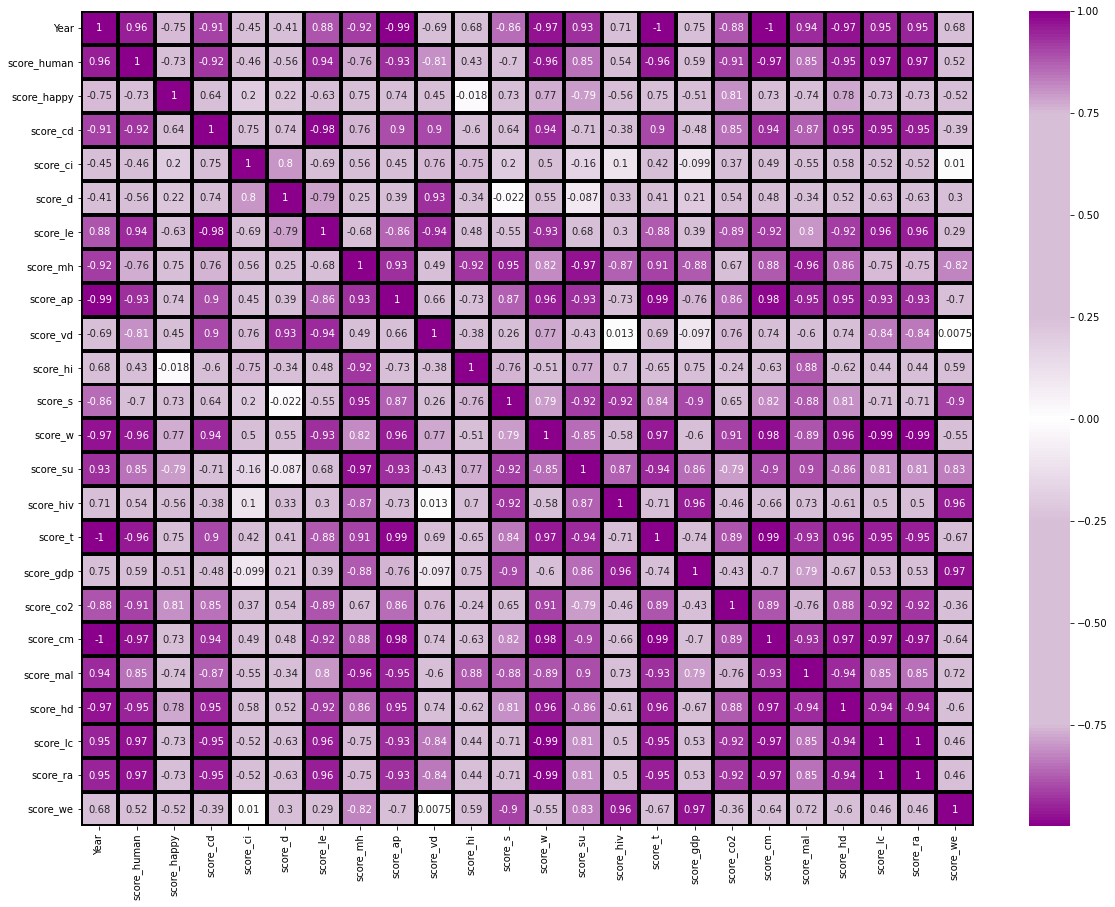

In [28]:
plt.figure(figsize = (20,15))

cmap = LinearSegmentedColormap.from_list(
    name='test', 
    colors=['darkmagenta','thistle','thistle','thistle','white','thistle','thistle','thistle','darkmagenta']
)
_=sns.heatmap(df_merged.corr(), annot=True,cmap=cmap,linewidths=3, linecolor='black')

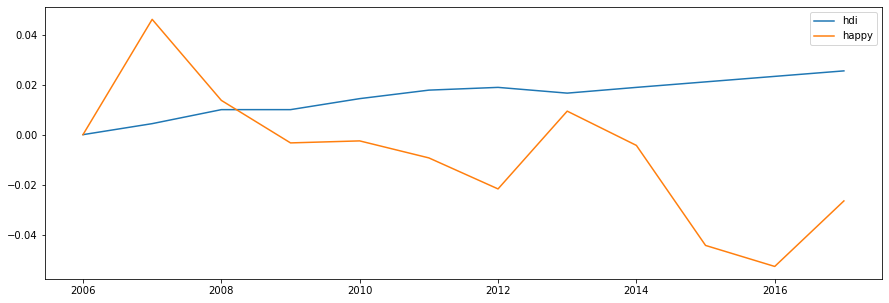

In [29]:
plt.figure(figsize = (15,5))
plt.plot(df_merged['Year'],df_merged['score_human'], label = 'hdi')
#plt.plot(df_merged['Year'],df_merged['score_le'],label = 'life')
plt.plot(df_merged['Year'],df_merged['score_happy'],label = 'happy')
plt.legend()

# Transform the dataframe: <br>
    For all data, multiply by the correlation to hdi(score_human)
    No longer using the correlation factor to weight. It adds inaccuracy to the data.
    If the data shows a decrease but is 'good' (decrease in deaths) reverse the sign.
    Same for 'bad' factors, make sure they are negative.

In [30]:
#give negative multiplier to negative factors
df_merged['score_cd'] = df_merged['score_cd'] *-1
df_merged['score_ci'] = df_merged['score_ci'] *-1
df_merged['score_d'] = df_merged['score_d'] *-1
df_merged['score_mh'] = df_merged['score_mh'] *-1
df_merged['score_ap'] = df_merged['score_ap'] *-1
df_merged['score_vd'] = df_merged['score_vd'] *-1
df_merged['score_s'] = df_merged['score_s'] *-1
df_merged['score_w'] = df_merged['score_w'] *-1
df_merged['score_su'] = df_merged['score_su'] *-1
df_merged['score_hiv'] = df_merged['score_hiv'] *-1
df_merged['score_t'] = df_merged['score_t'] *-1
df_merged['score_co2'] = df_merged['score_co2'] *-1
df_merged['score_cm'] = df_merged['score_cm'] *-1
df_merged['score_lc'] = df_merged['score_lc'] *-1
df_merged['score_ra'] = df_merged['score_ra'] *-1
df_merged['score_we'] = df_merged['score_we'] *-1

In [31]:
#make dfs for storage
score_human = []
score_happy = []
score_cd = []
score_ci = []
score_d = []
score_le = []
score_mh = []
score_ap = []
score_vd = []
score_hi = []
score_s = []
score_w = []
score_su = []
score_hiv = []
score_t = []
score_gdp = []
score_co2 = []
score_cm = []
score_mal = []
score_hd = []
score_lc = []
score_ra = []
score_we = []
#organize dfs in a dictionary
names_dic = { 2 : score_human,
              3 : score_happy,
              4 : score_cd, 
              5 : score_ci, 
              6 : score_d, 
              7 : score_le,
              8 : score_mh,
              9 : score_ap, 
              10 : score_vd, 
              11 : score_hi, 
              12 : score_s,
              13 : score_w,
              14 : score_su, 
              15 : score_hiv, 
              16 : score_t,
              17 : score_gdp,
              18 : score_co2,
              19 : score_cm,
              20 : score_mal,
              21 : score_hd,
              22 : score_lc,
              23 : score_ra,
              24 : score_we,
            }

#make variables for the loop
col = 2
corr_col = 3
dic_ind = 2
columns_list = list(df_merged.columns)

In [32]:
for x in list(names_dic)[:]:  
    #will put the weight into the first dictionary
    for i in df_merged.iloc[:,col]:
        #corr = df_corr.iloc[1][corr_col]
        num = i * 100
        names_dic[dic_ind].append(num)
        
    col +=1
    corr_col += 1
    dic_ind += 1

ci = []
col = 5
corr_row = 4
while col <= col_count:
    for i in df_merged.iloc[:,col]:
        corr = df_corr.iloc[1][corr_row]
        num = i * corr 
        ci.append(num)
        col += 1
print(ci)

for i in df_merged.columns[4:]:
    while col <= col_count:
        for i in df_merged.iloc[:,col]:
            corr = df_corr.iloc[1][corr_row]
            num = i * corr 
            compiled.append(num)
            col += 1
    col = 5
    corr_row = 4
print(compiled)

In [33]:
#set back to df
second = pd.DataFrame(data = names_dic)
second.columns = ['weighted_human','weighted_happy','weighted_cd','weighted_ci','weighted_d','weighted_le','weighted_mh','weighted_ap','weighted_vd','weighted_hi','weighted_s','weighted_w','weighted_su','weighted_hiv','weighted_t','weighted_gdp','weighted_co2','weighted_cm','weighted_mal','weighted_hd','weighted_lc','weighted_re','weighted_we']
second['year'] = [2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006]
final = df_merged.merge(second, how = 'left', left_on ='Year', right_on = 'year')
final['total_weighted'] = final['weighted_human']+final['weighted_happy']+final['weighted_cd'] + final['weighted_ci'] + final['weighted_d'] + final['weighted_le'] + final['weighted_ap'] + final['weighted_vd'] + final['weighted_s'] + final['weighted_w'] + final['weighted_su'] + final['weighted_hiv'] + final['weighted_t']+ final['weighted_gdp']+ final['weighted_co2']+ final['weighted_cm']+ final['weighted_mal']+ final['weighted_hd']+ final['weighted_lc']+ final['weighted_re']+ final['weighted_we']

# Transition to df for Visualization Tool
Correct the format of the df

In [34]:
new = pd.DataFrame(data = final.iloc[:,1])
new['Factor'] = 'Human Development Index'
new['Total'] = final.iloc[:,-1]
new['Score'] = final.iloc[:,25]

new0 = pd.DataFrame(data = final.iloc[:,1])
new0['Factor'] = 'Life Satisfaction'
new0['Total'] = final.iloc[:,-1]
new0['Score'] = final.iloc[:,26]

new1 = pd.DataFrame(data = final.iloc[:,1])
new1['Factor'] = 'Decrease in Cancer Deaths'
new1['Total'] = final.iloc[:,-1]
new1['Score'] = final.iloc[:,27]

new2 = pd.DataFrame(data = final.iloc[:,1])
new2['Factor'] = 'Decrease in Cancer Incidences'
new2['Total'] = final.iloc[:,-1]
new2['Score'] = final.iloc[:,28]

new3 = pd.DataFrame(data = final.iloc[:,1])
new3['Factor'] = 'Decrease in Autism'
new3['Total'] = final.iloc[:,-1]
new3['Score'] = final.iloc[:,29]

new4 = pd.DataFrame(data = final.iloc[:,1])
new4['Factor'] = 'Life Expectancy'
new4['Total'] = final.iloc[:,-1]
new4['Score'] = final.iloc[:,30]

#skip mental health

new5 = pd.DataFrame(data = final.iloc[:,1])
new5['Factor'] = 'Decrease in Air Pollution'
new5['Total'] = final.iloc[:,-1]
new5['Score'] = final.iloc[:,32]

new6 = pd.DataFrame(data = final.iloc[:,1])
new6['Factor'] = 'Decrease in Vaccine Preventable Disease'
new6['Total'] = final.iloc[:,-1]
new6['Score'] = final.iloc[:,33]

#skip health insurance

new7 = pd.DataFrame(data = final.iloc[:,1])
new7['Factor'] = 'Decrease in Suicide'
new7['Total'] = final.iloc[:,-1]
new7['Score'] = final.iloc[:,35]

new8 = pd.DataFrame(data = final.iloc[:,1])
new8['Factor'] = 'Decrease in Death by Unsafe Drinking Water'
new8['Total'] = final.iloc[:,-1]
new8['Score'] = final.iloc[:,36]

new9 = pd.DataFrame(data = final.iloc[:,1])
new9['Factor'] = 'Decrease in Death by Unsanitary Conditions'
new9['Total'] = final.iloc[:,-1]
new9['Score'] = final.iloc[:,37]

new10 = pd.DataFrame(data = final.iloc[:,1])
new10['Factor'] = 'Decrease in HIV Incidences'
new10['Total'] = final.iloc[:,-1]
new10['Score'] = final.iloc[:,38]

new11 = pd.DataFrame(data = final.iloc[:,1])
new11['Factor'] = 'Decrease in TB Incidences'
new11['Total'] = final.iloc[:,-1]
new11['Score'] = final.iloc[:,39]

new12 = pd.DataFrame(data = final.iloc[:,1])
new12['Factor'] = 'GDP'
new12['Total'] = final.iloc[:,-1]
new12['Score'] = final.iloc[:,40]

new13 = pd.DataFrame(data = final.iloc[:,1])
new13['Factor'] = 'Decrease in CO2 Emmisions'
new13['Total'] = final.iloc[:,-1]
new13['Score'] = final.iloc[:,41]

new14 = pd.DataFrame(data = final.iloc[:,1])
new14['Factor'] = 'Decrease in Child Mortality'
new14['Total'] = final.iloc[:,-1]
new14['Score'] = final.iloc[:,42]

new15 = pd.DataFrame(data = final.iloc[:,1])
new15['Factor'] = 'Decrease in Malnutrition'
new15['Total'] = final.iloc[:,-1]
new15['Score'] = final.iloc[:,43]

new16 = pd.DataFrame(data = final.iloc[:,1])
new16['Factor'] = 'Decrease in Household Debt'
new16['Total'] = final.iloc[:,-1]
new16['Score'] = final.iloc[:,44]

new17 = pd.DataFrame(data = final.iloc[:,1])
new17['Factor'] = 'Labor Compensation'
new17['Total'] = final.iloc[:,-1]
new17['Score'] = final.iloc[:,45]

new18 = pd.DataFrame(data = final.iloc[:,1])
new18['Factor'] = 'Decrease in Roadway Accidents'
new18['Total'] = final.iloc[:,-1]
new18['Score'] = final.iloc[:,46]

new19 = pd.DataFrame(data = final.iloc[:,1])
new19['Factor'] = 'Decrease in Waste Production'
new19['Total'] = final.iloc[:,-1]
new19['Score'] = final.iloc[:,47]

In [35]:
#merge the viz df
new_list = [new0,new1,new2,new3, new4, new5,new6, new7, new8, new5,new9, new10, new11, new12, new13, new14, new15, new16, new17, new18, new19]
all = new.append(new_list, ignore_index = True)

In [36]:
#print to csv
#all.to_csv('yr_frm_st.csv')
#all.to_csv('all.csv')